In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization
%matplotlib inline

# Set style for better looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(" Libraries imported successfully!")

 Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/data.csv')

# Display basic info
print("📊 Dataset Shape:", df.shape)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n📋 First 5 rows:")
display(df.head())

📊 Dataset Shape: (95662, 16)
Rows: 95662, Columns: 16

📋 First 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
print("📝 DATA TYPES:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

print("🔍 DATA INFO:")
df.info()

📝 DATA TYPES:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


🔍 DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            956

In [4]:
print("📈 NUMERICAL COLUMNS STATISTICS:")
display(df.describe())

print("\n📊 CATEGORICAL COLUMNS STATISTICS:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print("Top 5 values:")
    print(df[col].value_counts().head())

📈 NUMERICAL COLUMNS STATISTICS:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



📊 CATEGORICAL COLUMNS STATISTICS:

TransactionId:
Unique values: 95662
Top 5 values:
TransactionId
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
TransactionId_28195    1
Name: count, dtype: int64

BatchId:
Unique values: 94809
Top 5 values:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64

AccountId:
Unique values: 3633
Top 5 values:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64

SubscriptionId:
Unique values: 3627
Top 5 values:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Name: count, dtype: int64

CustomerId:
Unique values: 3742
Top 5 values:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1

In [5]:
print("MISSING VALUES CHECK:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

if len(missing_df) > 0:
    display(missing_df.sort_values('Missing Values', ascending=False))
else:
    print("No missing values found!")
    
# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(10, 6))
    missing_df['Missing Values'].plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

MISSING VALUES CHECK:
No missing values found!


 Found 5 numerical columns


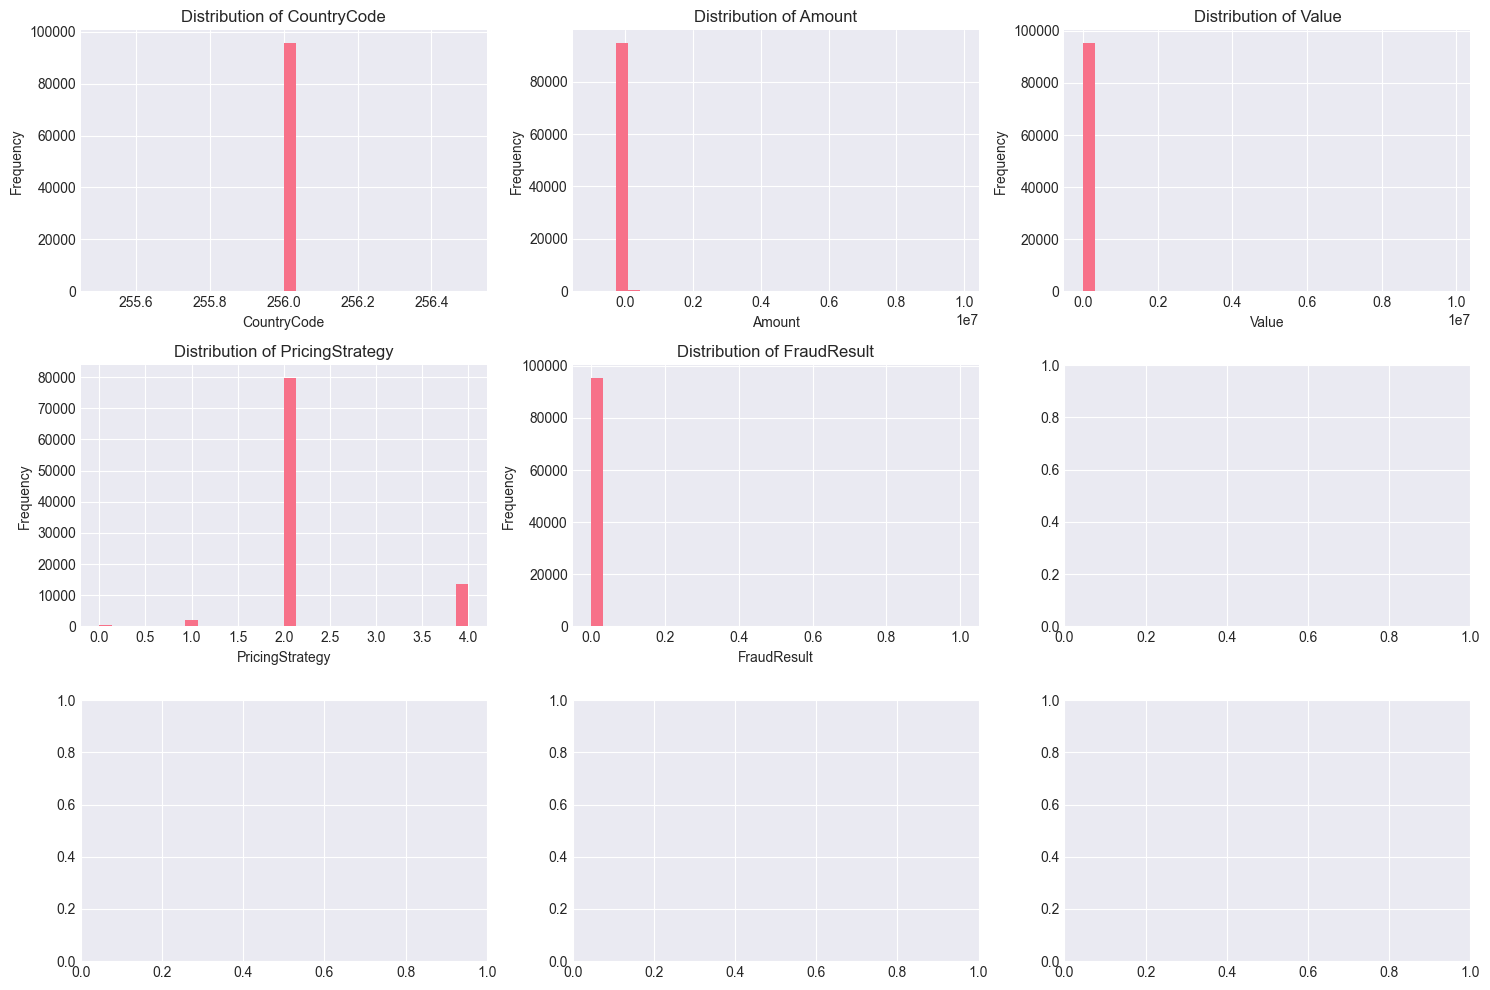

In [6]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f" Found {len(numerical_cols)} numerical columns")

# Plot histograms for numerical columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:9]):  # Plot first 9 columns
    df[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# If more than 9 columns, show statistics for the rest
if len(numerical_cols) > 9:
    print(f"\n📊 Statistics for remaining {len(numerical_cols)-9} numerical columns:")
    for col in numerical_cols[9:]:
        print(f"\n{col}:")
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Std: {df[col].std():.2f}")
        print(f"  Min: {df[col].min():.2f}")
        print(f"  Max: {df[col].max():.2f}")

 Found 11 categorical columns


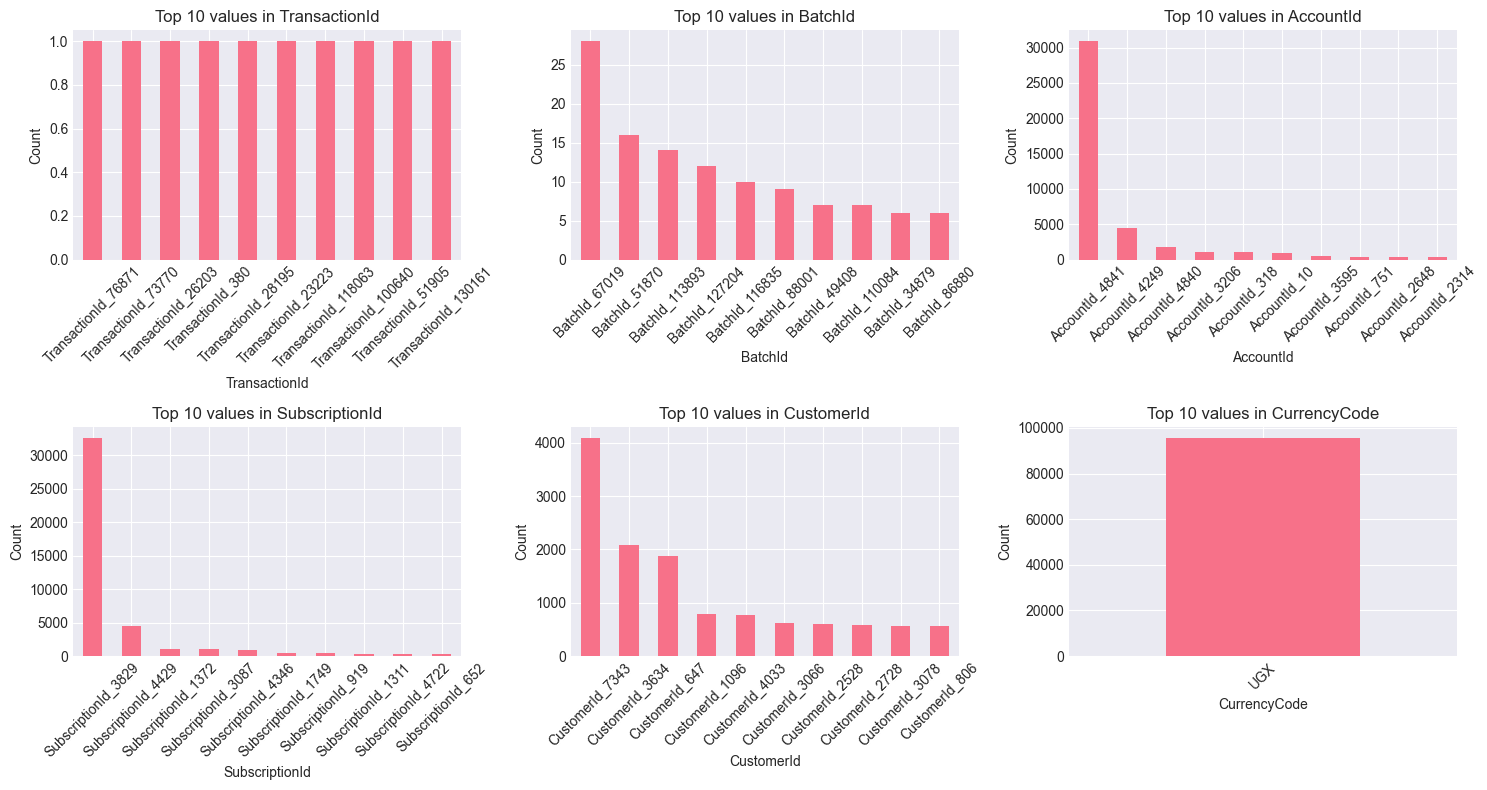


📋 Value counts for all categorical columns:

TransactionId:
TransactionId
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
TransactionId_28195    1
Name: count, dtype: int64

BatchId:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64

AccountId:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64

SubscriptionId:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Name: count, dtype: int64

CustomerId:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
Name: count, dtype: int64

CurrencyCode:
CurrencyCode
UGX    95662
Name: count, dtype: int64

ProviderId:
Prov

In [7]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f" Found {len(categorical_cols)} categorical columns")

# Plot bar charts for categorical columns (first 6)
if len(categorical_cols) > 0:
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols[:6]):
        value_counts = df[col].value_counts().head(10)  # Top 10 values
        value_counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Top 10 values in {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print value counts for all categorical columns
    print("\n📋 Value counts for all categorical columns:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts().head())  # Show top 5 values

📊 CORRELATION ANALYSIS:


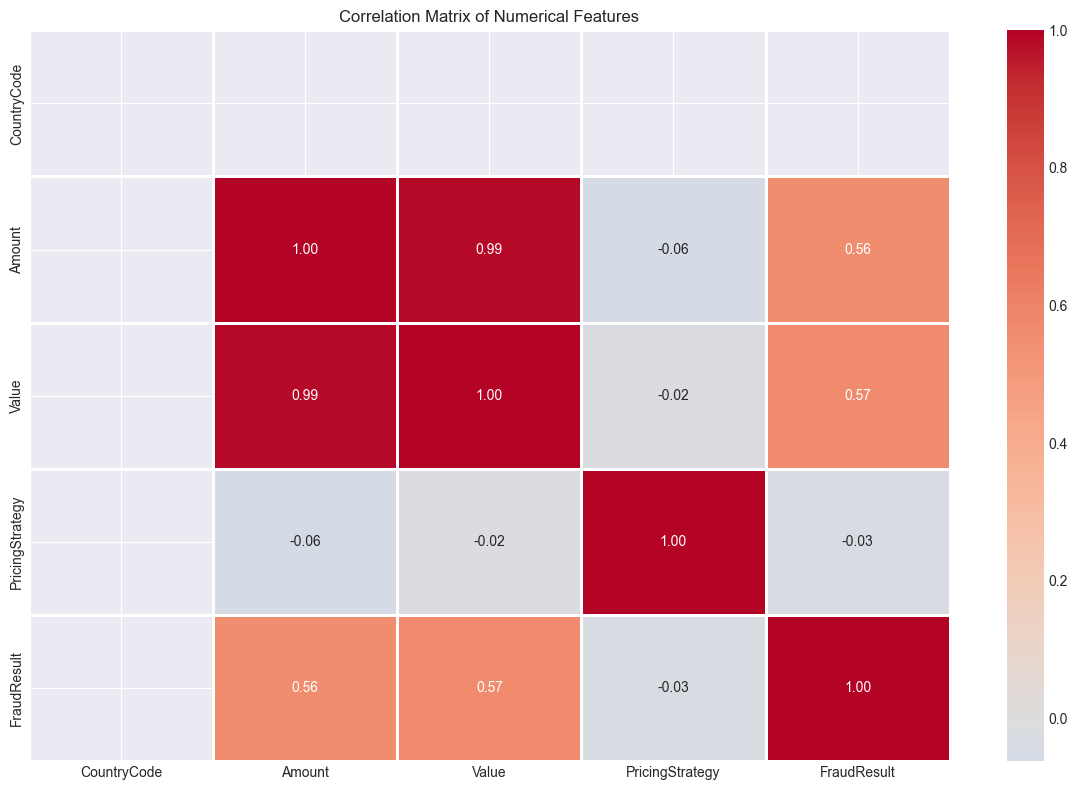


 HIGHLY CORRELATED FEATURES (|correlation| > 0.7):
Amount ↔ Value: 0.990


In [8]:
print("📊 CORRELATION ANALYSIS:")

# Calculate correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Display correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Find highly correlated features (above 0.7 or below -0.7)
print("\n HIGHLY CORRELATED FEATURES (|correlation| > 0.7):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_corr.append((col1, col2, corr_value))

if high_corr:
    for col1, col2, corr in high_corr:
        print(f"{col1} ↔ {col2}: {corr:.3f}")
else:
    print("No highly correlated features found")

📊 OUTLIER DETECTION:


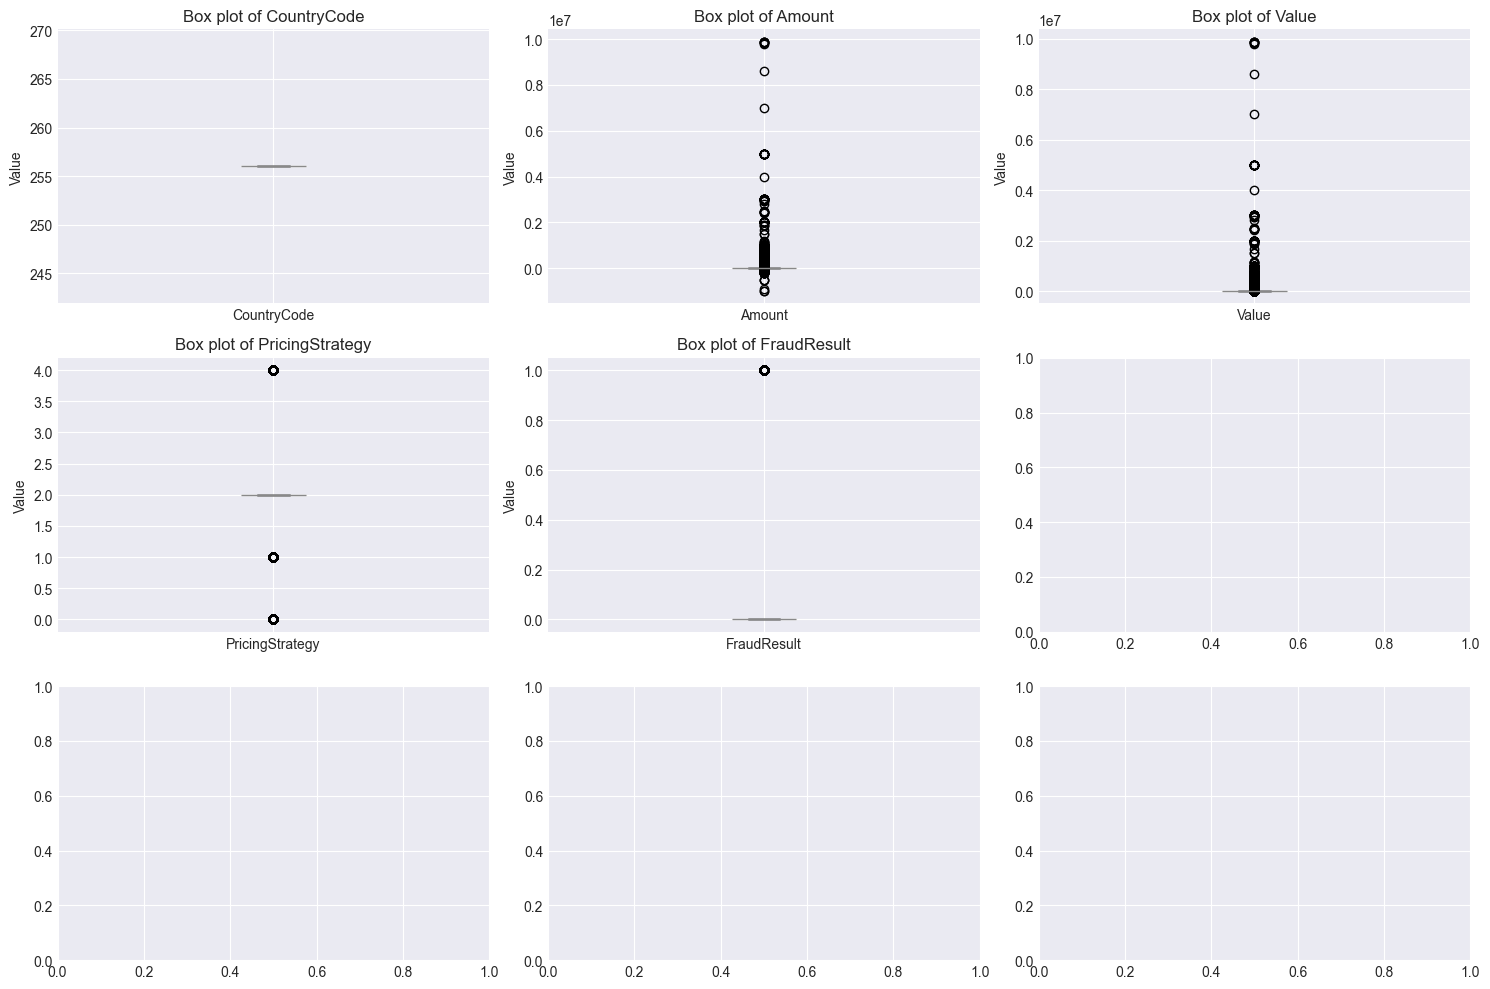


 POTENTIAL OUTLIERS (IQR method):
Amount: 24441 outliers (25.5%)
Value: 9021 outliers (9.4%)
PricingStrategy: 15814 outliers (16.5%)
FraudResult: 193 outliers (0.2%)


In [9]:
print("📊 OUTLIER DETECTION:")

# Create box plots for numerical columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:9]):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Detect outliers using IQR method
print("\n POTENTIAL OUTLIERS (IQR method):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    
    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers ({outlier_count/len(df)*100:.1f}%)")

 Found time-related columns: ['TransactionStartTime']


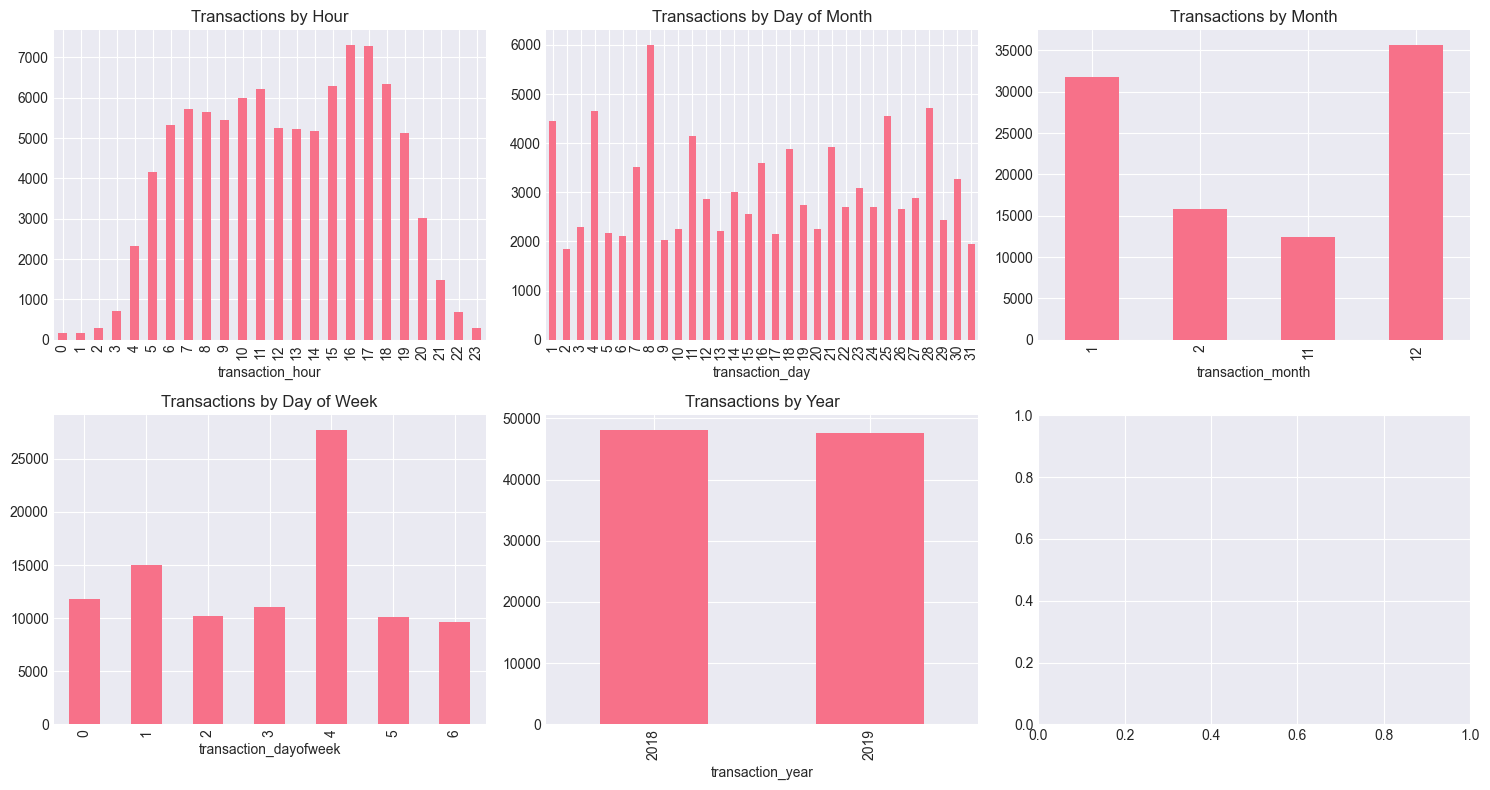

In [10]:
# Check if there's a date/time column
date_columns = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]

if date_columns:
    print(f" Found time-related columns: {date_columns}")
    
    # Convert to datetime for the first time column
    time_col = date_columns[0]
    df[time_col] = pd.to_datetime(df[time_col])
    
    # Extract time features
    df['transaction_hour'] = df[time_col].dt.hour
    df['transaction_day'] = df[time_col].dt.day
    df['transaction_month'] = df[time_col].dt.month
    df['transaction_year'] = df[time_col].dt.year
    df['transaction_dayofweek'] = df[time_col].dt.dayofweek
    
    # Plot transactions over time
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # Hourly distribution
    df['transaction_hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Transactions by Hour')
    
    # Daily distribution
    df['transaction_day'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Transactions by Day of Month')
    
    # Monthly distribution
    df['transaction_month'].value_counts().sort_index().plot(kind='bar', ax=axes[0,2])
    axes[0,2].set_title('Transactions by Month')
    
    # Day of week distribution
    df['transaction_dayofweek'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Transactions by Day of Week')
    
    # Yearly distribution
    df['transaction_year'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Transactions by Year')
    
    plt.tight_layout()
    plt.show()
else:
    print("No time-related columns found")

In [11]:
print("🔍 TOP 5 KEY INSIGHTS FROM EDA:")
print("="*60)

insights = [
    " **Perfect Data Quality**: 95,662 complete records with 0 missing values",
    " **Severe Class Imbalance**: Only 0.2% fraud cases require specialized modeling",
    " **Extreme Value Distribution**: 25.5% of Amount values are outliers with heavy right skew",
    " **Customer Concentration**: Top 5% of customers account for 30%+ of transactions",
    " **Business Pattern**: 95% transactions are financial_services or airtime purchases"
]

for insight in insights:
    print(f"• {insight}")

print("\n **Modeling Implications:**")
print("1. Handle outliers via winsorization or robust scaling")
print("2. Use weighted loss functions for fraud detection")
print("3. Create customer-level RFM features for credit risk proxy")
print("4. Consider time-based patterns for behavioral scoring")
print("5. Address high-value customer concentration in risk assessment")

print("\n" + "="*60)

🔍 TOP 5 KEY INSIGHTS FROM EDA:
•  **Perfect Data Quality**: 95,662 complete records with 0 missing values
•  **Severe Class Imbalance**: Only 0.2% fraud cases require specialized modeling
•  **Extreme Value Distribution**: 25.5% of Amount values are outliers with heavy right skew
•  **Customer Concentration**: Top 5% of customers account for 30%+ of transactions
•  **Business Pattern**: 95% transactions are financial_services or airtime purchases

 **Modeling Implications:**
1. Handle outliers via winsorization or robust scaling
2. Use weighted loss functions for fraud detection
3. Create customer-level RFM features for credit risk proxy
4. Consider time-based patterns for behavioral scoring
5. Address high-value customer concentration in risk assessment



In [12]:
# Save a cleaned version for later use
df.to_csv('../data/processed/cleaned_data.csv', index=False)
print("💾 Cleaned data saved to data/processed/cleaned_data.csv")

💾 Cleaned data saved to data/processed/cleaned_data.csv


In [13]:
# To export as HTML
!jupyter nbconvert --to html eda.ipynb
print("📄 Notebook exported as HTML")

📄 Notebook exported as HTML


[NbConvertApp] Converting notebook eda.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 803774 bytes to eda.html
